#**Heart Disease Prediction**

##Importing essential libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##Importing and understanding our dataset

In [ ]:
#connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the dataset froim drive

heart_data = pd.read_csv('/content/drive/MyDrive/Data_science_datasets/heart.csv')

###Verifying it as a 'dataframe' object in pandas

In [ ]:
type(heart_data)

pandas.core.frame.DataFrame

###Shape of dataset

In [ ]:
heart_data.shape

(303, 14)

###Printing out a few columns

In [ ]:
heart_data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


###Description of dataset

In [ ]:
heart_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There are no null values present in the dataset

Clearly, this is a classification problem, with the target variable having values '0' and '1'

#**Checking correlation between columns**

In [ ]:
heart_data["output"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: output, dtype: float64

In [ ]:
#Finding the correlation of the output with other features.

print(heart_data.corr()["output"].abs().sort_values(ascending=False))

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


From the above corelation table it is evident that only the first 9 features has a correlation value of greater than 0.2 and the rest are less than 0.15 which can be ignored.

In [ ]:
# Considering only the main 9 features and storing numeric variables in features to plot the correlation heatmap
features = ["exng","cp","oldpeak","thalachh","caa","slp","thall","sex","age","output"]

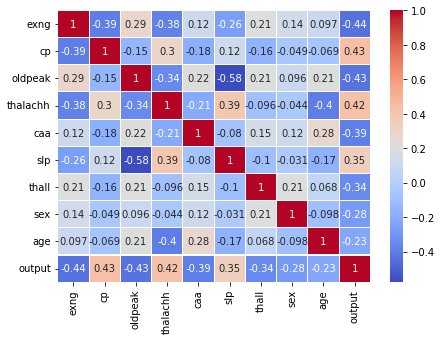

In [ ]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = heart_data.loc[:,features]

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

The above heat map gives the visualization of correlation between the feautres under consideration.

#**Exploratory Data Analysis (EDA)**

Analysing the output feature.

1    165
0    138
Name: output, dtype: int64


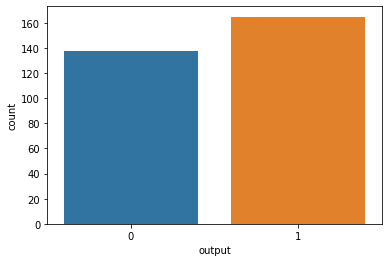

In [ ]:
y = heart_data["output"]

ax = sns.countplot(y)
target_temp = heart_data.output.value_counts()
print(target_temp)

1    165
0    138
Name: output, dtype: int64


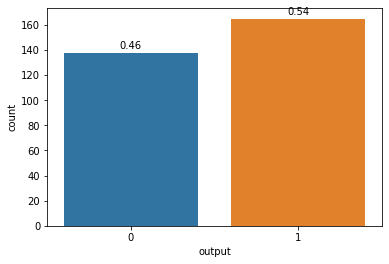

In [ ]:
#Finding the percentage of patients with and without heart problems

ax = sns.countplot(y)
target_temp = heart_data.output.value_counts()
print(target_temp)
# for showing the percentage
for p in ax.patches:
    height = p.get_height()
    total = 165+138
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{:1.2f}'.format(height/total),ha="center") 

In [ ]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


It is evident from the above plot that the patients with heart problems are greater than those without heart problems in our dataset.

#Analysing the "sex" feature

In [ ]:
heart_data["sex"].unique()

array([1, 0])

As expected sex feature has only two unique features

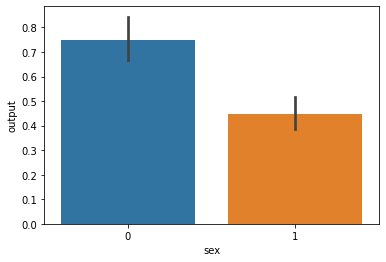

In [ ]:
sns.barplot(heart_data["sex"],y)

In [ ]:
countFemale = len(heart_data[heart_data.sex == 0])
countMale = len(heart_data[heart_data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(heart_data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(heart_data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


We notice, that females are more likely to have heart problems than males even though the maximum percentage of people under consideration belong the the male sex.

#Analysing the 'Chest Pain Type' feature

In [ ]:
heart_data["cp"].unique()

array([3, 2, 1, 0])

The Chest pain feature has values fropm 0 to 3

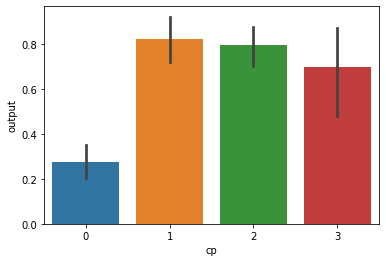

In [ ]:
sns.barplot(heart_data["cp"],y)

We can notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

#Analysing the 'EXNG' feature

In [ ]:
heart_data["exng"].unique()

array([0, 1])

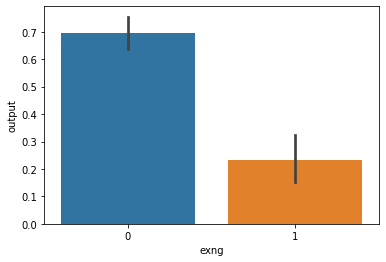

In [ ]:
sns.barplot(heart_data["exng"],y)

People with exng=1 i.e. Exercise induced angina are much less likely to have heart problems

#Analysing the 'oldpeak' feature

In [ ]:
heart_data["oldpeak"].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

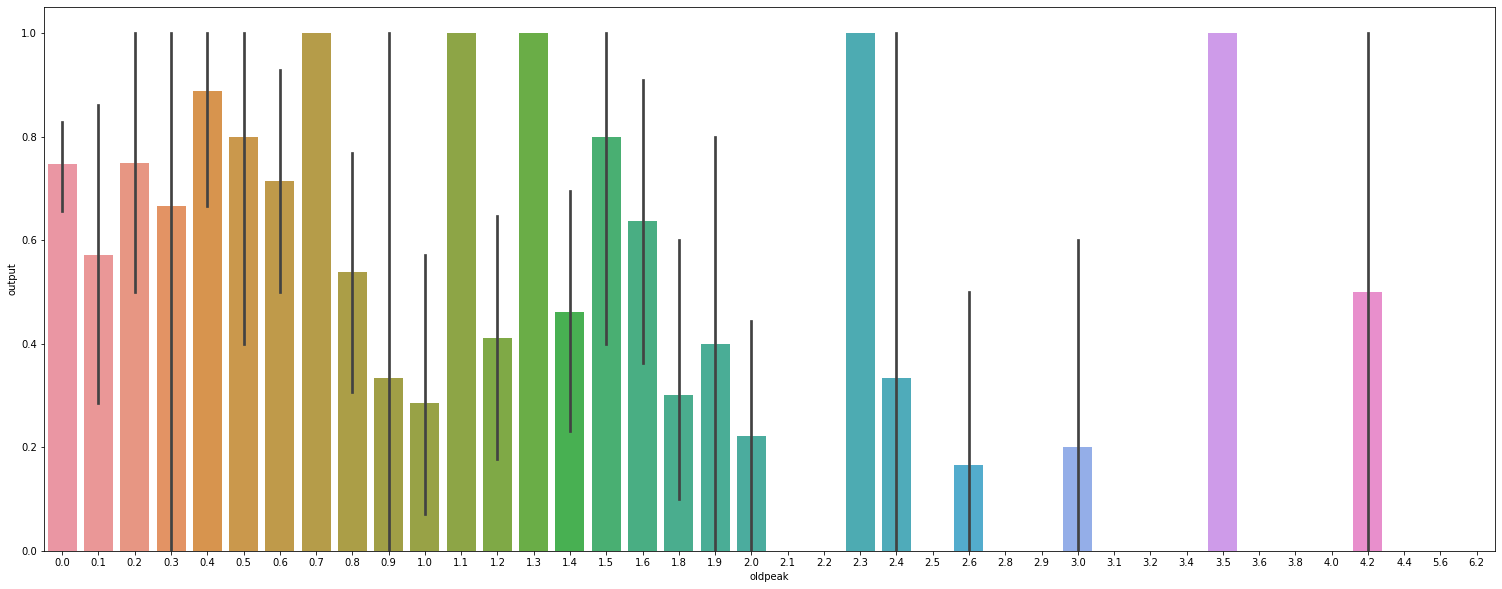

In [ ]:
plt.figure(figsize=(26,10))
sns.barplot(heart_data["oldpeak"],y)


#Analysing the thal feature

In [ ]:
heart_data["thall"].unique()

array([1, 2, 3, 0])

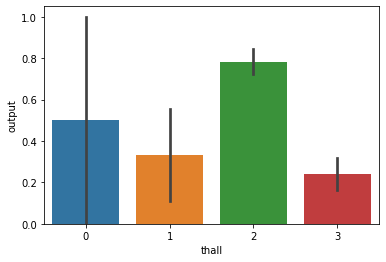

In [ ]:
sns.barplot(heart_data["thall"],y)

#Analysing the age feature

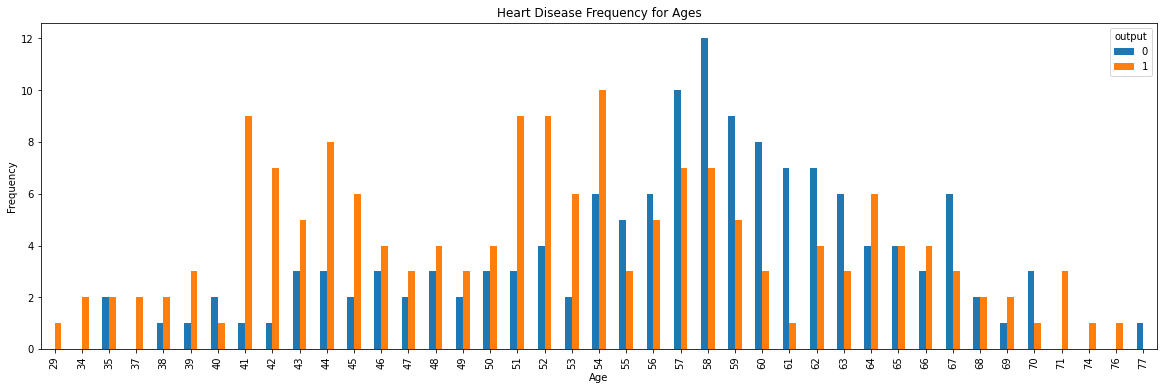

In [ ]:
pd.crosstab(heart_data.age,heart_data.output).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

From the above graph it is pretty evident that people belonging the age category of 41-59 are highly prone to die from the heart disease

#Analysing The person's resting blood pressure (trtbps)

In [ ]:
heart_data["trtbps"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

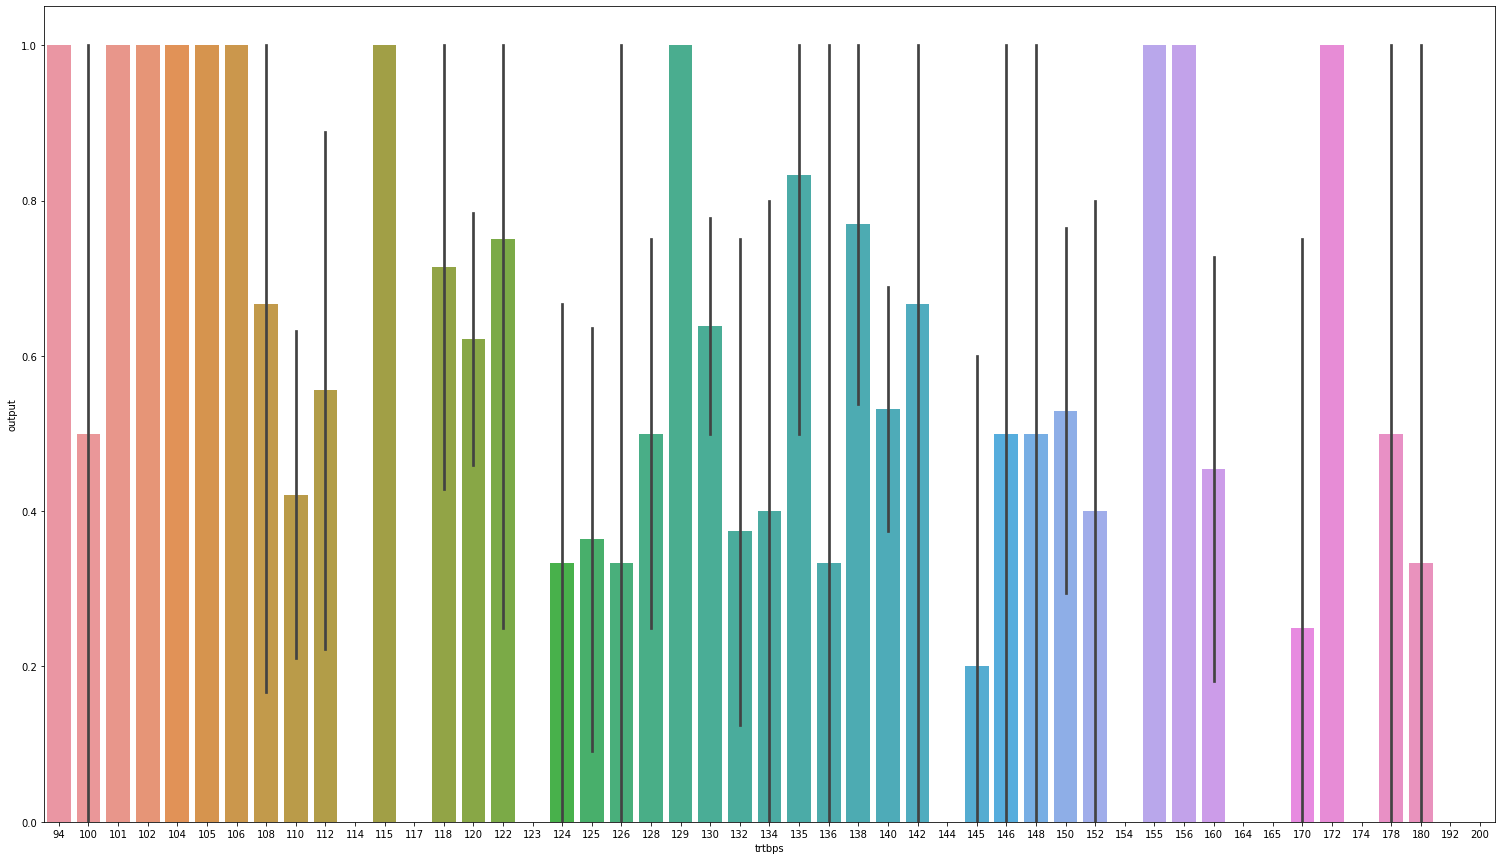

In [ ]:
plt.figure(figsize=(26,15))
sns.barplot(heart_data["trtbps"],y)

#**Train Test Split** 

In [ ]:
from sklearn.model_selection import train_test_split

predictors = heart_data.drop("output",axis=1)
target = heart_data["output"]

X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
y_train.shape

(242,)

In [ ]:
y_test.shape

(61,)

In [ ]:
#Importing Accuracy score

from sklearn.metrics import accuracy_score

#**Modelling and predicting with Machine Learning**

* **The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric.The chosen algorithm models are Logistic Regression, K-Nearest Neighbours Classifier, Support Vector machine, Decision Tree Classifier, Random Forest Classifier**


* **First of all, let's equip ourselves with a handy tool that benefits from the cohesion of SciKit Learn library and formulate a general function for training our models. The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff).**

In [ ]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [ ]:

score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 84.71%
Test accuracy: 85.25%


The obtained test and train accuracy from Logistic Regression are 85.25% and 84.71% respectively

In [ ]:
#Logistic Regression supports only solvers in ['liblinear', 'newton-cg'<-93.44, 'lbfgs'<-91.8, 'sag'<-72.13, 'saga'<-72.13]
clf = LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial').fit(X_test, y_test)
#The solver for weight optimization
#'lbfgs' is an optimizer in the family of quasi-Newton methods.
clf.score(X_test, y_test)

0.9344262295081968

##Confusion matrix

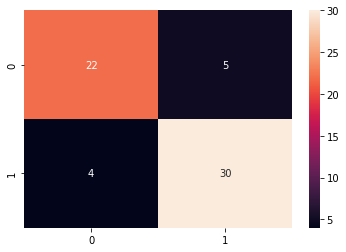

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix,annot = True, fmt = "d")

##Precision Score

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_lr)
print("Precision: ",precision)

Precision:  0.8571428571428571


##Recall

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_lr)
print("Recall is: ",recall)

Recall is:  0.8823529411764706


##F-Score

In [ ]:
print((2*precision*recall)/(precision+recall))

0.8695652173913043


In [ ]:
CM =pd.crosstab(y_test, y_pred_lr)
CM

col_0,0,1
output,,
0,22,5
1,4,30


In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [ ]:
#False Negative
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

**The Logistic Regression model has a good overall score where the test accuracy is at 85.25% and the precision score as 0.857 followed by recall as 0.88. It can be said that this algorithm is a suitable fit for the dataset available.**

#**K-Nearest Neighbours Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 71.90%
Test accuracy: 68.85%
[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


In [ ]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


In [ ]:
#Checking if the model is performing better without number of neighbors given.
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier)

Train accuracy: 78.10%
Test accuracy: 63.93%


The obtained test and train accuracy from K-Neighbors Classifier are 63.93% and 78.10% respectively

Lets check how the model is performing for different n_neighbors value

In [ ]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 52.46%
n_neigbors = 2
Train accuracy: 79.75%
Test accuracy: 60.66%
n_neigbors = 3
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 4
Train accuracy: 76.03%
Test accuracy: 63.93%
n_neigbors = 5
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 6
Train accuracy: 74.38%
Test accuracy: 65.57%
n_neigbors = 7
Train accuracy: 72.31%
Test accuracy: 67.21%
n_neigbors = 8
Train accuracy: 71.90%
Test accuracy: 68.85%
n_neigbors = 9
Train accuracy: 73.14%
Test accuracy: 67.21%


It can be found that 8 is the optimal value for n_neighbors

##Confusion matrix

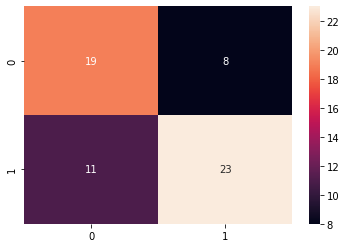

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matrix,annot = True, fmt = "d")

##Precision Score

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_knn)
print("Precision: ",precision)

Precision:  0.7419354838709677


##Recall

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_knn)
print("Recall is: ",recall)

Recall is:  0.6764705882352942


##F-Score

In [ ]:
print((2*precision*recall)/(precision+recall))

0.7076923076923077


In [ ]:
CM = pd.crosstab(y_test, y_pred_knn)
CM

col_0,0,1
output,,
0,19,8
1,11,23


In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False negative rate of the model

In [ ]:
fnr = FN*100/(FN+TP)
fnr

32.35294117647059

**The K-Nearest Neighors model has a average overall score where the test accuracy is at 68.85% and the precision score as 0.741 followed by recall as 0.67. It can be said that this algorithm is not a suitable fit for the dataset available.**

#**Support Vector machine**

In [ ]:
from sklearn import svm

x = svm.SVC
sv = train_model(X_train, y_train, X_test, y_test, x ,kernel='linear')

sv.fit(X_train, y_train)

y_pred_svm = sv.predict(X_test)
print(y_pred_svm)

Train accuracy: 84.71%
Test accuracy: 81.97%
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


The obtained test and train accuracy from Support Vector Machine are 81.97% and 84.71% respectively

In [ ]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_svm)+" %")

The accuracy score achieved using KNN is: 81.97 %


##Confusion Matrix

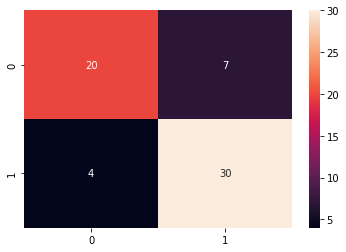

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred_svm)
sns.heatmap(matrix,annot = True, fmt = "d")

##Precision Score

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_svm)
print("Precision: ",precision)

Precision:  0.8108108108108109


##Recall

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_svm)
print("Recall is: ",recall)

Recall is:  0.8823529411764706


##F-Score

In [ ]:
print((2*precision*recall)/(precision+recall))

0.8450704225352113


In [ ]:
CM = pd.crosstab(y_test, y_pred_svm)
CM

col_0,0,1
output,,
0,20,7
1,4,30


In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

False negative rate of the model

In [ ]:
fnr = FN*100/(FN+TP)
fnr

11.764705882352942

**The Support Vector Machine model has a good overall score where the test accuracy is at 81.97% and the precision score as 0.81 followed by recall as 0.88. It can be said that this algorithm is also a suitable fit for the dataset available. But our aim is to find the best algorithm which can be known only after all model predicting**

#**Decision Tree Classifier**

In [ ]:
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing

In [ ]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,    
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred_dt = clf.predict(X_test)
print(y_pred_dt)

score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_dt)+" %")

[0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1]
The accuracy score achieved using Random Forest is: 77.05 %


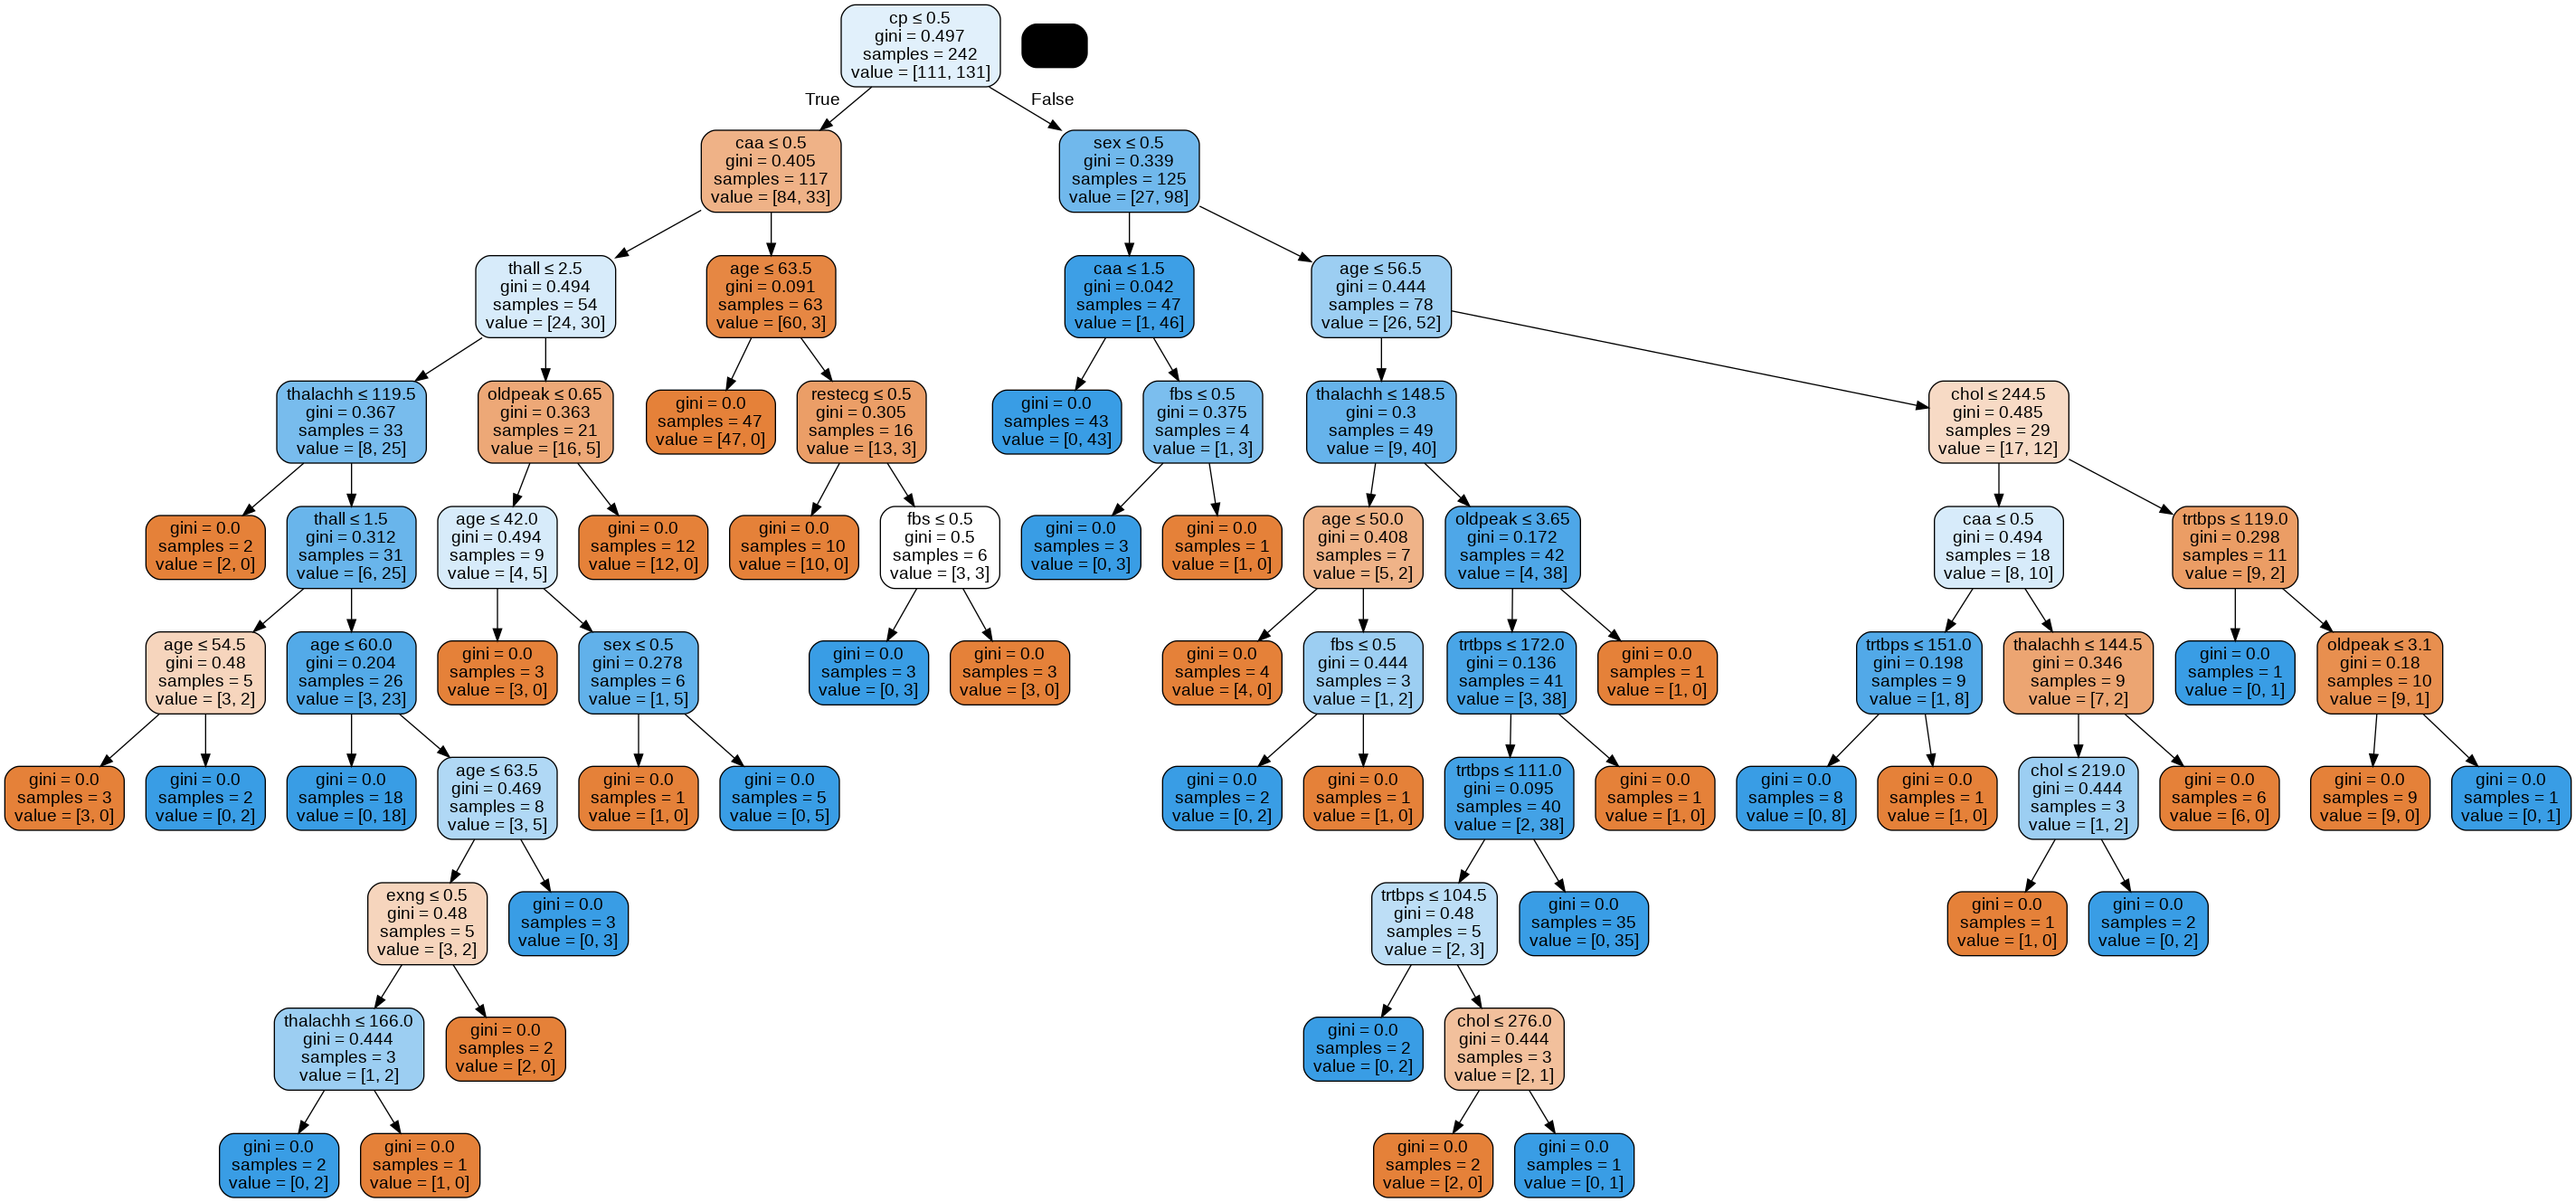

In [ ]:
plot_decision_tree(clf, X_train.columns,heart_data["output"])

##Confusion Matrix

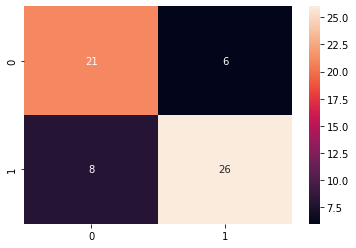

In [ ]:
matrix= confusion_matrix(y_test, y_pred_dt)
sns.heatmap(matrix,annot = True, fmt = "d")

##Precision score

In [ ]:
precision = precision_score(y_test, y_pred_dt)
print("Precision: ",precision)

Precision:  0.8125


##Recall

In [ ]:
recall = recall_score(y_test, y_pred_dt)
print("Recall is: ",recall)

Recall is:  0.7647058823529411


##F-score

In [ ]:
print((2*precision*recall)/(precision+recall))

0.787878787878788


In [ ]:
CM = pd.crosstab(y_test, y_pred_dt)
CM

col_0,0,1
output,,
0,21,6
1,8,26


In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

##False negative rate of the model

In [ ]:
fnr = FN*100/(FN+TP)
fnr

23.529411764705884

**The Decision Tree Classifier model has a good overall score where the accuracy score is at 80.33% and the precision score as 0.843 followed by recall as 0.794.**

#**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)


[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [ ]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 88.52 %


In [ ]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


##Confusion matrix

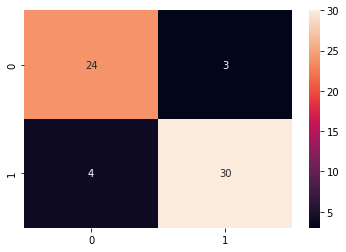

In [ ]:
matrix= confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")

##precision score

In [ ]:
precision = precision_score(y_test, y_pred_rf)
print("Precision: ",precision)

Precision:  0.9090909090909091


##recall

In [ ]:
ecall = recall_score(y_test, y_pred_rf)
print("Recall is: ",recall)

Recall is:  0.7647058823529411


##F-score

In [ ]:
print((2*precision*recall)/(precision+recall))

0.8306709265175718


In [ ]:
CM = pd.crosstab(y_test, y_pred_rf)
CM

col_0,0,1
output,,
0,24,3
1,4,30


In [ ]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

##False negative rate of the model

In [ ]:
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

**The Random Forest model has the best overall score where the test accuracy is at 88.52% and the precision score as 0.909 followed by recall as 0.794. It can be said that this algorithm is a suitable fit for the dataset available.**

#**Final Conclusion**

In [ ]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Support Vector Machine', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), tree.DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), 
        svm.SVC(kernel='linear'), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

In [ ]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.688525
Decision Trees,0.819672
Logistic Regression,0.852459
Support Vector Machine,0.819672
Random Forests,0.885246


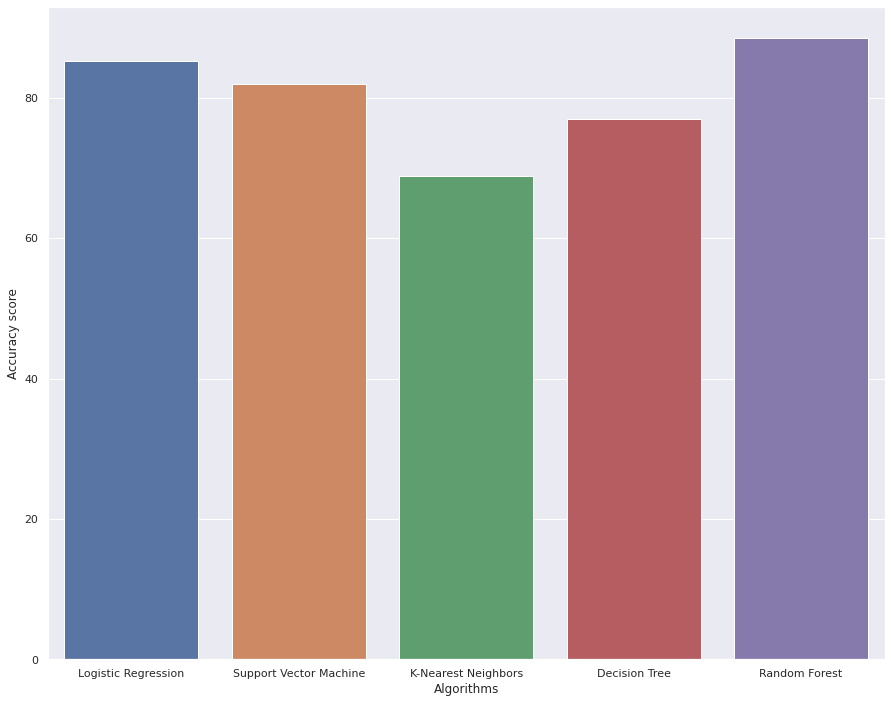

In [ ]:
scores = [score_lr,score_svm,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"] 
sns.set(rc={'figure.figsize':(15,12)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

* From the above plot we can conclude that random forest is the best suited algorithm here followed by logistic regression in the second place.
* It can also be concluded by saying that K-nearest neighbors is the least suitable for this dataset.